In [1]:
import sqlite3
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
path = os.path.join("Databases", "Players", "BorussiaDortmund", "ErlingHaaland", "ErlingHaaland_All_Shots_Data.db")
conn = sqlite3.connect(path)
c = conn.cursor()
print(path)

Databases\Players\BorussiaDortmund\ErlingHaaland\ErlingHaaland_All_Shots_Data.db


In [3]:
sql_query = """SELECT date,
    (
    (AVG(
        CASE
            WHEN result LIKE '%Goal%' THEN 1
            ELSE 0
        END
        )
    OVER (ORDER BY date ROWS BETWEEN 20 PRECEDING AND CURRENT ROW))
    -
    (AVG(xg) OVER (ORDER BY date ROWS BETWEEN 20 PRECEDING AND CURRENT ROW))
    ) AS xg_overperformance
    FROM ErlingHaaland_All_Shots_Data
    """
data = pd.read_sql(sql_query, conn)

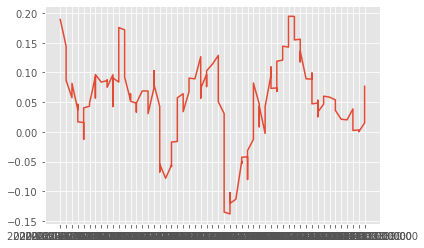

In [4]:
plt.style.use('ggplot')
plt.plot(data.date[20:], data.xg_overperformance[20:])
plt.show()

In [5]:
data

,date,xg_overperformance
0,2020-01-18 14:30:00,0.920667
1,2020-01-18 14:30:00,0.500023
2,2020-01-18 14:30:00,0.559072
3,2020-01-24 19:30:00,0.389508
4,2020-01-24 19:30:00,0.362279
...,...,...
194,2022-04-30 13:30:00,0.015017
195,2022-04-30 13:30:00,0.028679
196,2022-04-30 13:30:00,0.034061
197,2022-04-30 13:30:00,0.031110


In [6]:
conn.close()